Solution of the exercice where we have to write a 2-dimensional netCDF file.      
The main module we need is [NCDatasets](https://github.com/Alexander-Barth/NCDatasets.jl).

In [1]:
using NCDatasets

# Data
We create fake data: temperature as a random field, longitude and latitude as regularly spaced vectors.

In [2]:
dlon = 0.25;    # longitude resolution
dlat = 0.25;   # latitude resolution
lonmin = 27.;
lonmax = 42.;
latmin = 40.;
latmax = 48.;

In [6]:
lonvalues = collect(lonmin:dlon:lonmax);
latvalues = collect(latmin:dlat:latmax);
temperature = rand(length(latvalues), length(lonvalues));

In [8]:
temperature

33×61 Array{Float64,2}:
 0.44675    0.301356    0.132995   …  0.977404   0.581972   0.966816 
 0.867167   0.243018    0.367531      0.458439   0.59688    0.62353  
 0.613325   0.407266    0.611638      0.298716   0.0860318  0.384852 
 0.911331   0.495718    0.220162      0.525271   0.398145   0.982229 
 0.996768   0.442833    0.286736      0.591907   0.444983   0.268061 
 0.404969   0.746382    0.655468   …  0.838617   0.240567   0.851687 
 0.70288    0.410607    0.0893677     0.924723   0.587553   0.857727 
 0.462494   0.18142     0.29569       0.763669   0.550411   0.622876 
 0.222085   0.547233    0.712652      0.161909   0.782376   0.422746 
 0.901598   0.214051    0.310115      0.83428    0.888616   0.0933776
 0.303265   0.590069    0.115523   …  0.812803   0.601756   0.238621 
 0.780714   0.918706    0.17952       0.21376    0.381287   0.739178 
 0.211838   0.335064    0.50194       0.537679   0.204585   0.130768 
 ⋮                                 ⋱                        ⋮     

We can check the size of the temperature field:

In [10]:
@show size(temperature);
@show size(lonvalues)

size(temperature) = (33, 61)
size(lonvalues) = (61,)


(61,)

# NetCDF creation
First we create a dataset.     
We remove the file in case it already exists.

In [19]:
datafile = "../data/temp_exercise.nc";
if isfile(datafile)
    @info("File already exists, will remove it")
    rm(datafile)
end
ds = Dataset(datafile, "c");

┌ Info: File already exists, will remove it
└ @ Main In[19]:3


Then we define the dimensions (`lon` and `lat`):

In [20]:
length(lonvalues), length(latvalues)

(61, 33)

In [21]:
defDim(ds, "lon", length(lonvalues));
defDim(ds, "lat", length(latvalues));

We continue by defining the variables corresponding to the coordinates:

In [22]:
defVar(ds, "lon", Float64, ("lon",));
defVar(ds, "lat", Float64, ("lat",));

to which we can assign a value:

In [23]:
ds["lon"][:] = lonvalues;
ds["lat"][:] = latvalues;

Finally we define the temperature variable and assign a value to it:

In [24]:
T = defVar(ds, "temperature", Float64, ("lat", "lon"));
T[:] = temperature;
close(ds)

In [ ]:
Dataset(datafile, "c") do ds
    ...
    ...
end

Note that we close the dataset with the last line.

We check if it worked, for example using [`ncdump`](https://www.unidata.ucar.edu/software/netcdf/netcdf-4/newdocs/netcdf/ncdump.html):
```julia
run(`ncdump temperature2D.nc`)
```

or with [ncview](http://meteora.ucsd.edu/~pierce/ncview_home_page.html):
```julia
run(`ncview temperature2D.nc`)
```

which should display something like this: ![ncview](./Images/netcdf-exercice.jpg)

In [25]:
using PyPlot

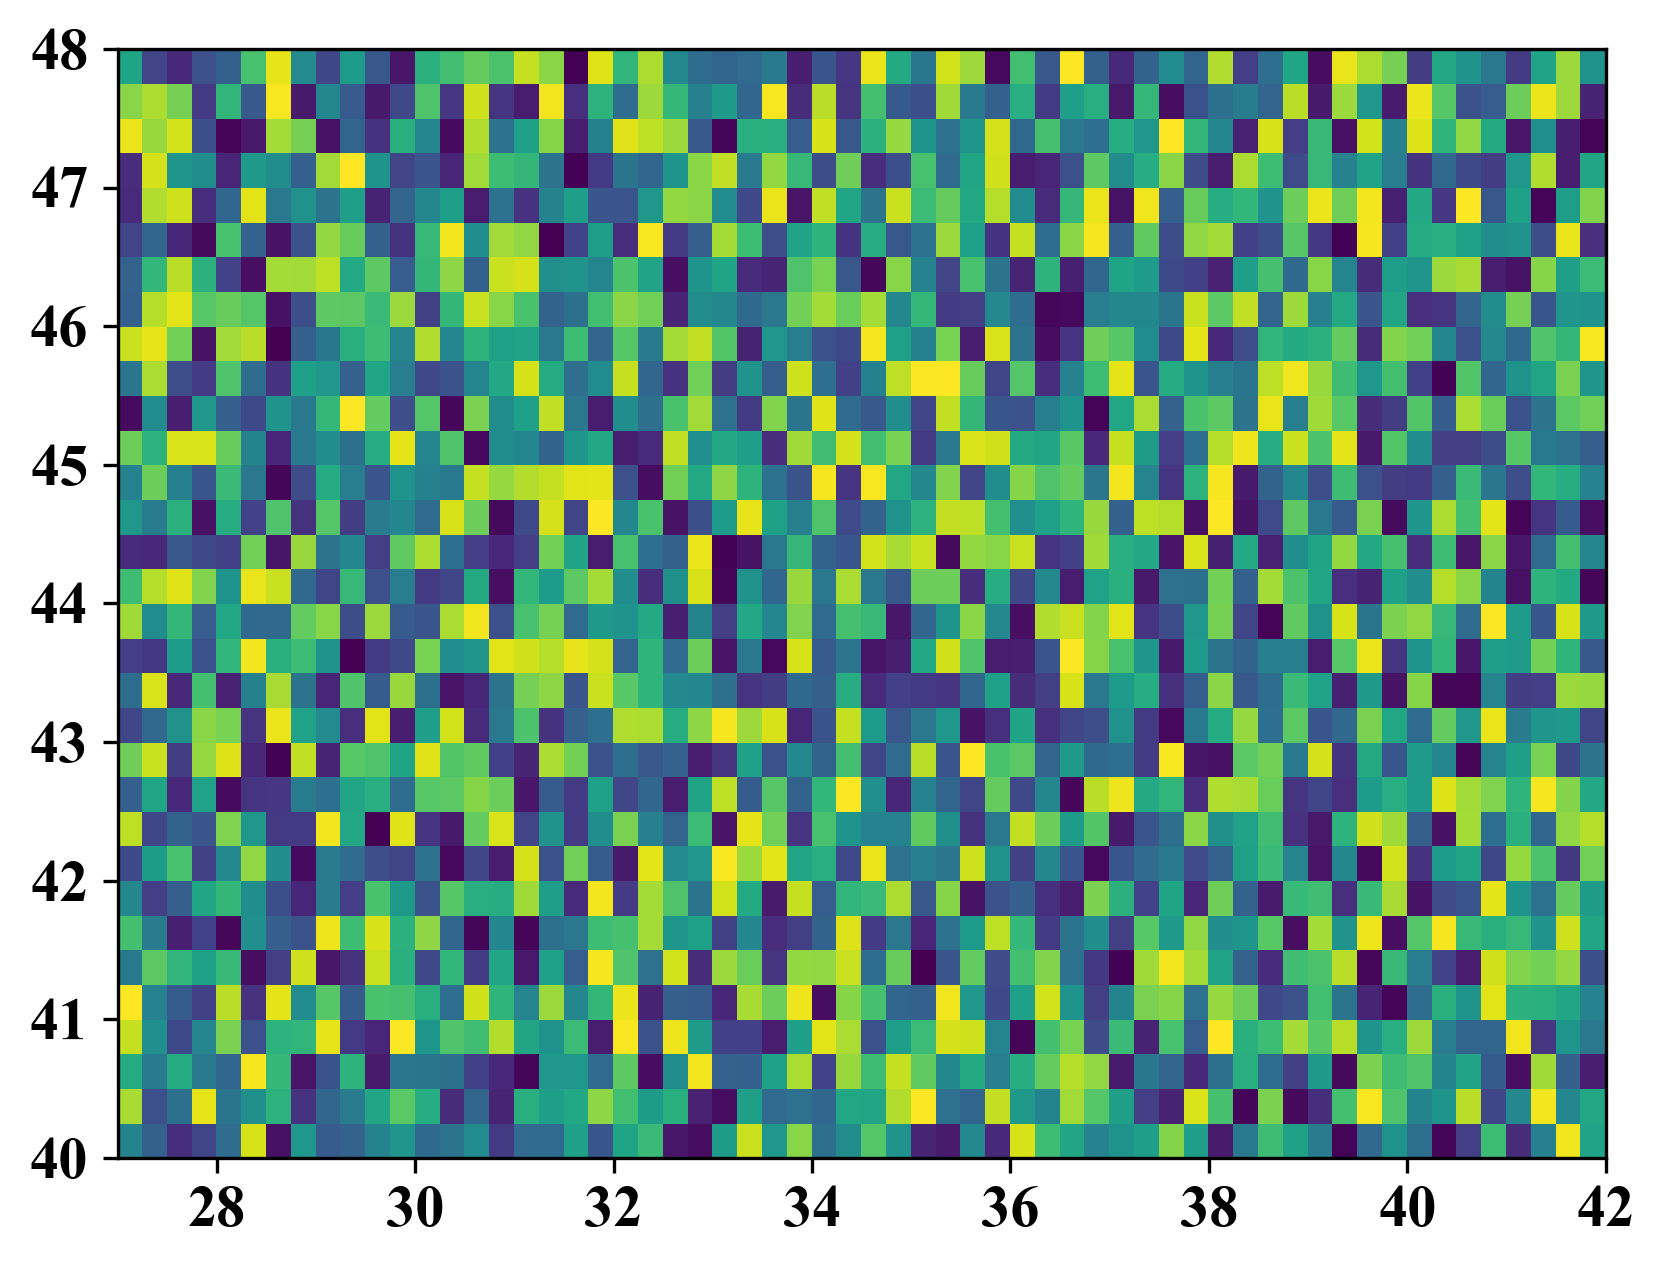

PyObject <matplotlib.collections.QuadMesh object at 0x7fd1835e0f10>

In [27]:
pcolormesh(lonvalues, latvalues, temperature)